In [1]:
import sys
sys.path.append('E:/Data Science/ML/ud120-projects/tools/')
sys.path.append('E:/Data Science/ML/ud120-projects/choose_your_own')
sys.path.append('E:/Data Science/ML/ud120-projects/datasets_questions')

import os
os.chdir('E:/Data Science/ML/ud120-projects/pca')

import warnings
warnings.simplefilter('ignore', DeprecationWarning)


Faces recognition example using eigenfaces and SVMs

The dataset used in this example is a preprocessed excerpt of the
"Labeled Faces in the Wild", aka LFW_:

  http://vis-www.cs.umass.edu/lfw/lfw-funneled.tgz (233MB)

  .. _LFW: http://vis-www.cs.umass.edu/lfw/

  original source: http://scikit-learn.org/stable/auto_examples/applications/face_recognition.html




D:\Python\Anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
D:\Python\Anaconda2\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7
Extracting the top 150 eigenfaces from 966 faces


D:\Python\Anaconda2\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)


done in 0.191s
Projecting the input data on the eigenfaces orthonormal basis
done in 0.051s
Fitting the classifier to the training set
done in 31.150s
Best estimator found by grid search:
SVC(C=1000.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.005, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Predicting the people names on the testing set
done in 0.097s
                   precision    recall  f1-score   support

     Ariel Sharon       0.70      0.54      0.61        13
     Colin Powell       0.81      0.87      0.84        60
  Donald Rumsfeld       0.94      0.63      0.76        27
    George W Bush       0.83      0.98      0.90       146
Gerhard Schroeder       0.95      0.76      0.84        25
      Hugo Chavez       1.00      0.47      0.64        15
       Tony Blair       0.94      0.81      0.87        36

      avg / total       0.86      0.85     

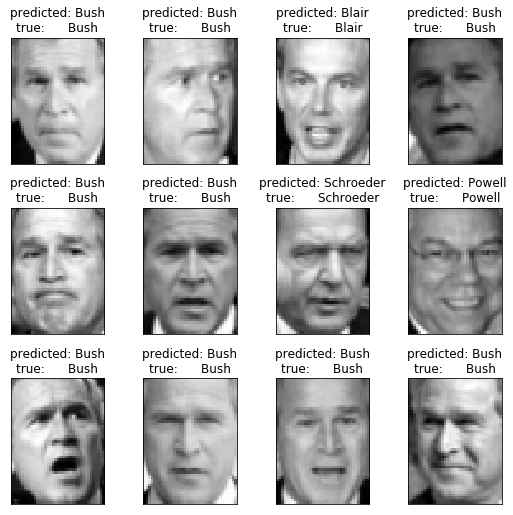

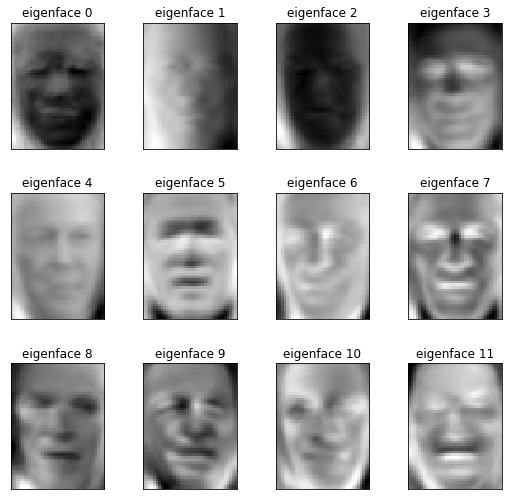

In [2]:
%matplotlib inline

# code provided with the course
%run eigenfaces.py

# Explained Variance of Each PC

In [3]:
print 'Variance explained by the first principal component:  {0}'.format(pca.explained_variance_ratio_[0])
print 'Variance explained by the second principal component: {0}'.format(pca.explained_variance_ratio_[1])

Variance explained by the first principal component:  0.193465337157
Variance explained by the second principal component: 0.151168435812


# F1 Score vs. No. of PCs Used

In [4]:
for n_components in [10, 15, 25, 50, 100, 250]:
    pca = RandomizedPCA(n_components=n_components, whiten=True).fit(X_train)

    eigenfaces = pca.components_.reshape((n_components, h, w))

    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)


    # Train a SVM classification model
    param_grid = {
                  'C': [1e3, 5e3, 1e4, 5e4, 1e5],
                  'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1],
                 }
    clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid)
    clf = clf.fit(X_train_pca, y_train)


    # Quantitative evaluation of the model quality on the test set
    y_pred = clf.predict(X_test_pca)

    if n_components==10:
        print 'n_components' + classification_report(y_test, y_pred, target_names=target_names).split('\n')[0]

    print '{0:12d}'.format(n_components) + classification_report(y_test, y_pred, target_names=target_names).split('\n')[2]

D:\Python\Anaconda2\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)


n_components                   precision    recall  f1-score   support
          10     Ariel Sharon       0.09      0.15      0.11        13


D:\Python\Anaconda2\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)


          15     Ariel Sharon       0.50      0.38      0.43        13


D:\Python\Anaconda2\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)


          25     Ariel Sharon       0.47      0.69      0.56        13


D:\Python\Anaconda2\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)


          50     Ariel Sharon       0.56      0.69      0.62        13


D:\Python\Anaconda2\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)


         100     Ariel Sharon       0.64      0.69      0.67        13


D:\Python\Anaconda2\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)


         250     Ariel Sharon       0.56      0.69      0.62        13
